In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC


In [7]:
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [8]:
data=pd.read_csv('diabetes.csv')

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


correlation between Glucose and Insulin : 0.33135710992020934


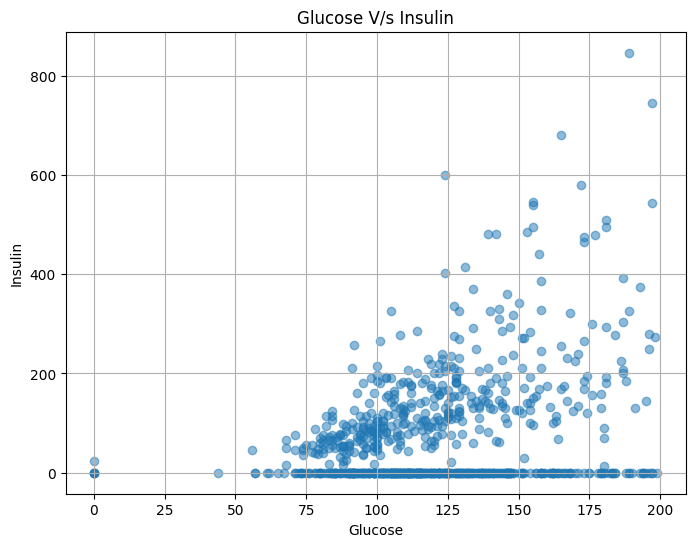

In [11]:
glucose_insulin_df=data[['Glucose','Insulin']]
glucose_insulin_df=glucose_insulin_df.dropna()
correlation=glucose_insulin_df['Glucose'].corr(glucose_insulin_df['Insulin'])
print("correlation between Glucose and Insulin :",correlation)
plt.figure(figsize=(8,6))
plt.scatter(glucose_insulin_df['Glucose'],glucose_insulin_df['Insulin'],alpha=0.5)
plt.title('Glucose V/s Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.grid(True)
plt.show()

Underweight:0 diabetes cases out of 4 total recorded data
Normal:7 diabetes cases out of 108 total recorded data
Overweight:44 diabetes cases out of 180 total recorded data
Obese Class I:100 diabetes cases out of 221 total recorded data
Obese Class II:61 diabetes cases out of 148 total recorded data
Obese Class III:54 diabetes cases out of 96 total recorded data


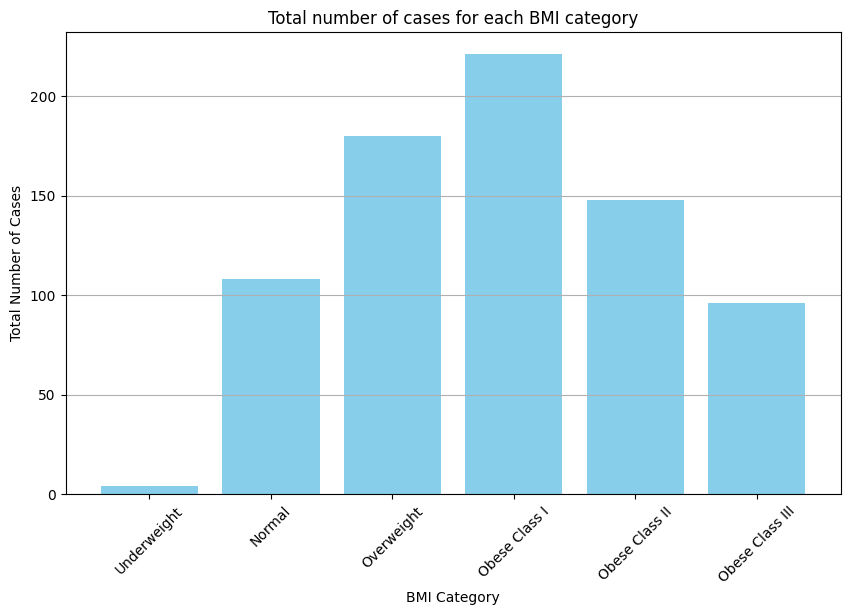

In [12]:

bmi_bins = [0,18.5,25,30,35,40,100]
bmi_labels = ["Underweight","Normal","Overweight","Obese Class I","Obese Class II","Obese Class III"]
data["BMI_Category"] = pd.cut(data["BMI"], bins=bmi_bins, labels=bmi_labels)
bmi_diabetes_cases = {}
bmi_total_cases = {}
for label in bmi_labels:
  subset_df = data[data["BMI_Category"]== label]
  bmi_diabetes_cases[label] = len(subset_df[subset_df["Outcome"]== 1])
  bmi_total_cases[label] = len(subset_df)
for label in bmi_labels:
  print("{}:{} diabetes cases out of {} total recorded data".format(label, bmi_diabetes_cases[label], bmi_total_cases[label]))
plt.figure(figsize=(10,6))
plt.bar(bmi_diabetes_cases.keys(),bmi_total_cases.values(),color='skyblue')
plt.title("Total number of cases for each BMI category")
plt.xlabel("BMI Category")
plt.ylabel("Total Number of Cases")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [20]:
# Assuming `data` is your dataframe and contains 'Outcome' column
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

# One-hot encode categorical variables
x = pd.get_dummies(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model training
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(x_train, y_train)

patient_data = {
    "Pregnancies": None,
    "Glucose": None,
    "BloodPressure": None,
    "SkinThickness": None,
    "Insulin": None,
    "BMI": None,
    "DiabetesPedigreeFunction": None,
    "Age": None
}

for feature in patient_data:
    patient_data[feature] = float(input(f"Enter {feature} for the patient: "))

# Convert patient data to dataframe
patient_df = pd.DataFrame(patient_data, index=[0])

# One-hot encode patient data to match training data
patient_df = pd.get_dummies(patient_df)

# Add any missing columns with zeros (to match the training data columns)
for col in x_train.columns:
    if col not in patient_df.columns:
        patient_df[col] = 0

# Reorder columns to match training data
patient_df = patient_df[x_train.columns]

# Predicting the outcome
prediction = model.predict(patient_df)
print("\nPatient Data:")
print(patient_df)

if prediction[0] == 1:
    print("Diabetes Detected")
else:
    print("Normal")

Enter Pregnancies for the patient: 1
Enter Glucose for the patient: 93
Enter BloodPressure for the patient: 70
Enter SkinThickness for the patient: 31
Enter Insulin for the patient: 0
Enter BMI for the patient: 30.4
Enter DiabetesPedigreeFunction for the patient: 0.315
Enter Age for the patient: 23

Patient Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0     93.0           70.0           31.0      0.0  30.4   

   DiabetesPedigreeFunction   Age  BMI_Category_Underweight  \
0                     0.315  23.0                         0   

   BMI_Category_Normal  BMI_Category_Overweight  BMI_Category_Obese Class I  \
0                    0                        0                           0   

   BMI_Category_Obese Class II  BMI_Category_Obese Class III  
0                            0                             0  
Normal


Building Diabetes Detection Model within XGBoost & KNN

In [35]:
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

# One-hot encode categorical variables
x = pd.get_dummies(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model training
model = xgb.XGBClassifier( random_state=42)
model.fit(x_train, y_train)

patient_data = {
    "Pregnancies": None,
    "Glucose": None,
    "BloodPressure": None,
    "SkinThickness": None,
    "Insulin": None,
    "BMI": None,
    "DiabetesPedigreeFunction": None,
    "Age": None
}

for feature in patient_data:
    patient_data[feature] = float(input(f"Enter {feature} for the patient: "))

# Convert patient data to dataframe
patient_df = pd.DataFrame(patient_data, index=[0])

# One-hot encode patient data to match training data
patient_df = pd.get_dummies(patient_df)

# Add any missing columns with zeros (to match the training data columns)
for col in x_train.columns:
    if col not in patient_df.columns:
        patient_df[col] = 0

# Reorder columns to match training data
patient_df = patient_df[x_train.columns]

# Predicting the outcome
prediction = model.predict(patient_df)
print("\nPatient Data:")
print(patient_df)

if prediction[0] == 1:
    print("Diabetes Detected")
else:
    print("Normal")

Enter Pregnancies for the patient: 2
Enter Glucose for the patient: 98
Enter BloodPressure for the patient: 215
Enter SkinThickness for the patient: 32
Enter Insulin for the patient: 88
Enter BMI for the patient: 34
Enter DiabetesPedigreeFunction for the patient: 0.5
Enter Age for the patient: 68

Patient Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0     98.0          215.0           32.0     88.0  34.0   

   DiabetesPedigreeFunction   Age  
0                       0.5  68.0  
Diabetes Detected


In [36]:
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

# One-hot encode categorical variables
x = pd.get_dummies(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model training
model = KNeighborsClassifier( )
model.fit(x_train, y_train)

patient_data = {
    "Pregnancies": None,
    "Glucose": None,
    "BloodPressure": None,
    "SkinThickness": None,
    "Insulin": None,
    "BMI": None,
    "DiabetesPedigreeFunction": None,
    "Age": None
}

for feature in patient_data:
    patient_data[feature] = float(input(f"Enter {feature} for the patient: "))

# Convert patient data to dataframe
patient_df = pd.DataFrame(patient_data, index=[0])

# One-hot encode patient data to match training data
patient_df = pd.get_dummies(patient_df)

# Add any missing columns with zeros (to match the training data columns)
for col in x_train.columns:
    if col not in patient_df.columns:
        patient_df[col] = 0

# Reorder columns to match training data
patient_df = patient_df[x_train.columns]

# Predicting the outcome
prediction = model.predict(patient_df)
print("\nPatient Data:")
print(patient_df)

if prediction[0] == 1:
    print("Diabetes Detected")
else:
    print("Normal")

Enter Pregnancies for the patient: 1
Enter Glucose for the patient: 126
Enter BloodPressure for the patient: 112
Enter SkinThickness for the patient: 9
Enter Insulin for the patient: 2
Enter BMI for the patient: 36
Enter DiabetesPedigreeFunction for the patient: 0.1
Enter Age for the patient: 32

Patient Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0    126.0          112.0            9.0      2.0  36.0   

   DiabetesPedigreeFunction   Age  
0                       0.1  32.0  
Normal


Evaluating Accuracy & performance of Disease Detection Model

In [32]:
def model_evaluation(data):
    x = data.drop("Outcome", axis=1)
    y = data["Outcome"]

    model = SVC(kernel='linear', C=1.0, random_state=42)  # Corrected `c` to `C`

    cv_score = cross_val_score(model, x, y, cv=5)
    cv_prediction = cross_val_predict(model, x, y, cv=5)

    cv_accuracy = cv_score.mean()  # Corrected `cv_accracy` to `cv_accuracy`
    cv_precision = precision_score(y, cv_prediction)
    cv_recall = recall_score(y, cv_prediction)

    print("Cross-validation accuracy:", cv_accuracy)
    print("Cross-validation precision:", cv_precision)
    print("Cross-validation recall:", cv_recall)


data = pd.read_csv("diabetes.csv")
model_evaluation(data)

Cross-validation accuracy: 0.7656820303879128
Cross-validation precision: 0.7075471698113207
Cross-validation recall: 0.5597014925373134
